In [1]:
%run "S0-init.ipynb"

     total_bill   tip     sex smoker   day    time  size
40        16.04  2.24    Male     No   Sat  Dinner     3
194       16.58  4.00    Male    Yes  Thur   Lunch     2
129       22.82  2.18    Male     No  Thur   Lunch     3
241       22.67  2.00    Male    Yes   Sat  Dinner     2
125       29.80  4.20  Female     No  Thur   Lunch     6


# Linear Regression with Scikit Learn

To perform linear regression with th `scikit-learn` module, we first create a `LinearRegression` estimator.   
Once the estimator is created, the following parameters can be specified (they are all optional):
* `fit_intercept`: if `True`, the default an intercept is fit for this model.
* `normalize`: if `True` all the features supplied in the `fit` method will be normalized, the default is `False`
* `copy_X`: default = 'True`

This regressor has two commonly used attributes, which cn be accessed after the model has been fit to the data:
* `coef_`
* `intercept_`

Once created, this estimator is `fit` to the training data, after which it can be used to predict new values from the test data. These two actions, along with a measure of the performance of the regressor, are encapsulated in the following three functions that can be called on a `LinearRegression` estimator:
* `fit`: fits a linear model to the supplied features
* `predict`
* `score`: Computes a regression score

One important point is the requirement for scikit-learn estimators to accept two-dimensional feature matrices. Since we are performing a simple linear regression with only one feature for both the independent and dependen variables, we need to employ the `reshape` method to change 1D vector we extracted from our data set to be explicit 2-D Numpy matrices.

However, before computing a linear regression to the tips data, we must first process these data to make them ready for the `LinearRegression` estimator.

In [2]:
# We want to split our data into training and testing
from sklearn.model_selection import train_test_split

# This is the amount to hold out for 'blind' testing
frac = 0.4

# Select a single independent variable and the dependent variable
# We must reshape the arrays to ensure they are of size
ind_data = df.total_bill.values.reshape(df.shape[0], 1)
dep_data = df['tip'].values.reshape(df.shape[0], 1)

# Create test/train splits for independent and dependent data
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)

tip = 0.14 total_bill
LR Model score =  39.9%


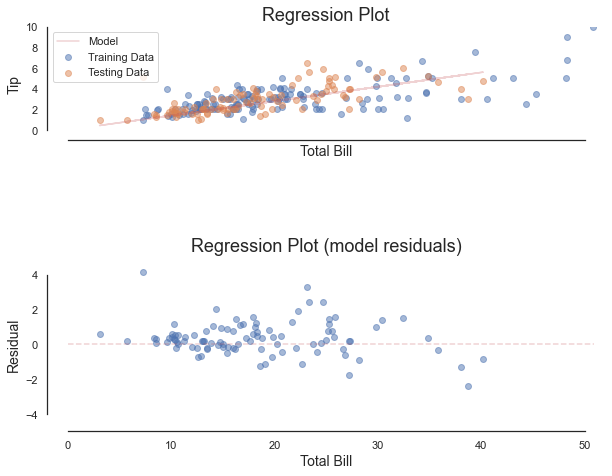

In [4]:
# With this data, we can now employ the scikit-learn library's linear regressio estimator
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression(fit_intercept=False)
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.coef_[0][0]:4.2f} total_bill")
# Compute model prediction for test data
results = model.predict(ind_test)

# compute score and display result (coefficient of determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')

utils.make_lr_plot(ind_train, dep_train, ind_test, dep_test, results, labels=['Total Bill', 'Tip'])

tip = 0.99 + 0.10 total_bill
LR Model score =  46.6%


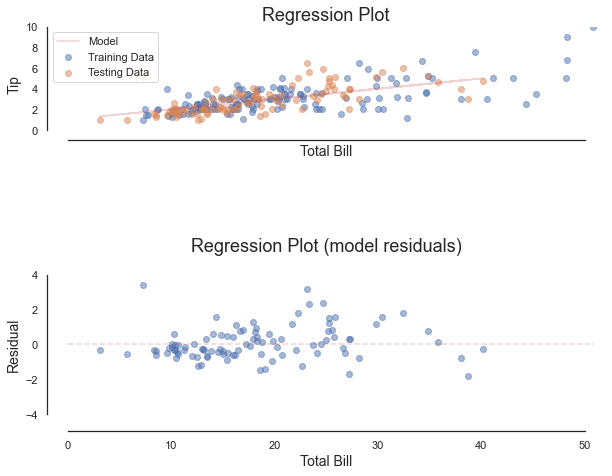

In [5]:
# Create and fit our linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.intercept_[0]:4.2f} + {model.coef_[0][0]:4.2f} total_bill")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')

utils.make_lr_plot(ind_train, dep_train, ind_test, dep_test, results, labels=['Total Bill', 'Tip'])